# Kaggle--Avocado Prices dataset

# 2019-04-13 start

# Summary

## Describe Statistics

- Mean of average price is 1.4,mode is 1.15


- Mode of total volume is not unique.


- The other data(except average price) is dispersion,

  and large different from normal distribution


- All of data is possitive distribution


## Total bags of each year

- 2017 has the most number of total bags than other year


- 2018's data is not completed


- Number of bags is increasing.


## Trend of average price

- The trend of average price seems to be cyclical


- 2017's average price has much more fluctuation


- 2017/9 has the highest average price,

  and 2016/5 has the lowest average price


- Winter's price is normally low,

  and autumn's price is normally high.
  
  
## Percentage of different size bags

- percentage of differnet size bags each year


Year | Bag Size | Percentage |
----- | -------- | ------------ |
2015 | Small Bags | 82.19% |
     | Large Bags | 17.10% |
     | XLarge Bags | 0.7% |
2016 | Small Bags | 75.62% |
     | Large Bags | 23.01% |
     | XLarge Bags | 1.37% |
2017 | Small Bags | 74.29% |
     | Large Bags | 24.26% |
     | XLarge Bags | 1.46% |
2018 | Small Bags | 73.39% |
     | Large Bags | 25.14% |
     | XLarge Bags | 1.47% |


- The percentage of small bags is decreasing.


- Between 2015 and 2016,XLarge bags suddenly increase.


- The percentage of large bags and Xlarge bags is increasing.

## Correlation analysis

- Category is negative correlation with average price


- Region is less correlation with average price


- Feature selection is feasibility


## Principal component analysis

- Finding the explained variance ratio


- n_components choose 3

## Predict

- Using feature selection is better than using PCA


- With using feature selection,r2_score is 0.52


- With using this data,training model is hard


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error, \
mean_absolute_error,explained_variance_score
sns.set()

In [2]:
original=pd.read_csv('../input/avocado.csv')

In [3]:
print(original.head())
print(original.shape)
print(original.isnull().sum())
print(original.dtypes)
print(original.columns)
print(original['type'].unique())

   Unnamed: 0        Date  AveragePrice   ...            type  year  region
0           0  2015-12-27          1.33   ...    conventional  2015  Albany
1           1  2015-12-20          1.35   ...    conventional  2015  Albany
2           2  2015-12-13          0.93   ...    conventional  2015  Albany
3           3  2015-12-06          1.08   ...    conventional  2015  Albany
4           4  2015-11-29          1.28   ...    conventional  2015  Albany

[5 rows x 14 columns]
(18249, 14)
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLar

## Data Preprocessing

In [4]:
original.drop(columns='Unnamed: 0',inplace=True)

In [5]:
original.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
original['Date']=pd.to_datetime(original['Date'])

In [7]:
original.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [8]:
original['Month']=[i.month for i in original['Date']]

In [9]:
original.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [10]:
original['4046']=original['4046'].astype('str')
original['4225']=original['4225'].astype('str')
original['4770']=original['4770'].astype('str')

## Question Defintion


- Which year has the most number of bags?


- What is the trend of Average price?


- What is the percentage of different size bags of each year?


- Can we predict the average price with this data?

## Describe Statistics

In [11]:
original.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


In [12]:
def cv(data):
    x=data.mean()
    y=data.std()
    coefficientofvariation=(round((y/x)*100,2))
    return coefficientofvariation

In [13]:
print('AveragePrice cv:%1.2f%%'%(cv(original['AveragePrice'])))
print('Total Volume cv:%1.2f%%'%(cv(original['Total Volume'])))
print('Total Bags cv:%1.2f%%'%(cv(original['Total Bags'])))
print('Small Bags cv:%1.2f%%'%(cv(original['Small Bags'])))
print('Large Bags cv:%1.2f%%'%(cv(original['Large Bags'])))
print('XLarge Bags cv:%1.2f%%'%(cv(original['XLarge Bags'])))

AveragePrice cv:28.64%
Total Volume cv:405.99%
Total Bags cv:411.55%
Small Bags cv:409.55%
Large Bags cv:448.98%
XLarge Bags cv:569.56%


In [14]:
x=['AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']
print('skewness')
print('=============================')
print(original.skew())
print('=============================')
print('kurtosis')
print('=============================')
print(original.kurt())
print('=============================')
print('mode')
print('=============================')
print('average Price mode:',original['AveragePrice'].mode())
print('Total Volume mode:',original['Total Volume'].mode())
print('Total Bags mode:',original['Total Bags'].mode())
print('Small Bags mode:',original['Small Bags'].mode())
print('Large Bags mode:',original['Large Bags'].mode())
print('XLarge Bags mode:',original['XLarge Bags'].mode())


skewness
AveragePrice     0.580303
Total Volume     9.007687
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64
kurtosis
AveragePrice      0.325196
Total Volume     92.104458
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
year             -1.032747
Month            -1.265284
dtype: float64
mode
average Price mode: 0    1.15
dtype: float64
Total Volume mode: 0       2038.99
1       2858.31
2       3288.85
3       3529.44
4       3713.49
5       4103.97
6       7223.46
7       9465.99
8      13234.04
9      19634.24
10     46602.16
11    569349.05
dtype: float64
Total Bags mode: 0    0.0
dtype: float64
Small Bags mode: 0    0.0
dtype: float64
Large Bags mode: 0    0.0
dtype: float64
XLarge Bags mode: 0    0.0
dtype: float64


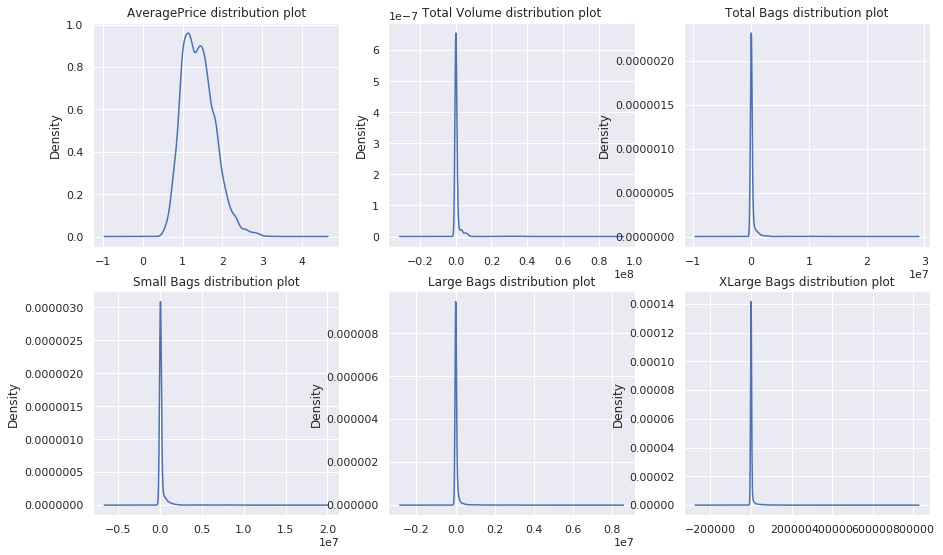

In [15]:
z0=plt.figure(figsize=(15,14))
for i in range(len(x)):
    z0.add_subplot(3,3,i+1)
    original[str(x[i])].plot(kind='kde',title='%s distribution plot'%x[i])
else:
    pass
plt.show()

## Summary

- Mean of average Price is 1.4,mode is 1.15


- Mode of total volume is not unique,

  and mode of Xlarge Bags is 0,
  
  other data has no mode.


- Coefficient of variation of data except average price is big,

  and other data's coefficient of variation is over 100%,
  
  means other data is much more dispersive than average price.
  


- The skewness of average price is possitive distribution,

  and the kurtosis of average price is platykurtic.
  


- The skewness values of other data is big,

  which means other data's distribution has much more different from
  
  normal distribution.
  
  And skewness values are all possitive,which means all of data is 
  
  possitive distribution.


- The kurtosis of other data is leptokurtic.

  

## Bags

Which year has the most number of bags?

In [16]:
bagGroup=original.groupby(by='year')
bagsum=bagGroup.sum()
bagSum=pd.DataFrame(bagsum.loc[:,'Total Bags'])
bagSum.iloc[0:3,0]

year
2015    7.721922e+08
2016    1.463159e+09
2017    1.646289e+09
Name: Total Bags, dtype: float64

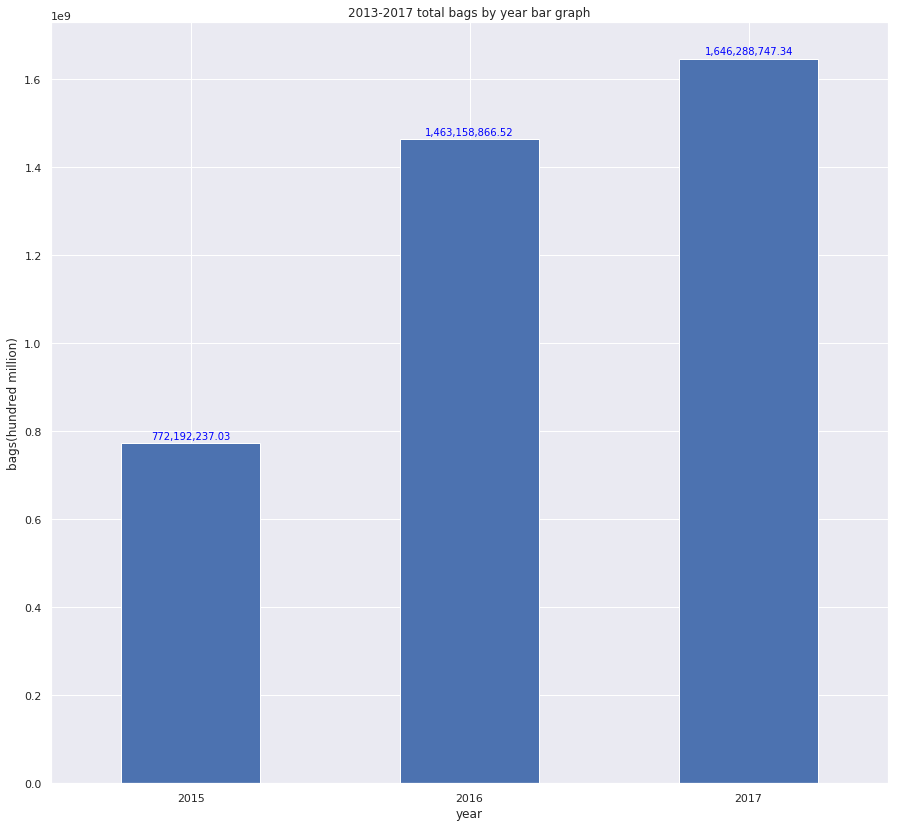

In [17]:
z1=bagSum.iloc[0:3].plot.bar(figsize=(15,14),legend=False)
z1.get_figure()
x=np.arange(bagsum.index.shape[0]-1)
y=np.array(bagSum.iloc[0:3,0])
plt.title('2013-2017 total bags by year bar graph',fontsize='large')
plt.ylabel('bags(hundred million)')
plt.xticks(x,bagSum.index[0:3],rotation=0)
for i,j in zip(x,y):
    plt.text(i,j+10000000,format(round(j,2),','),color='blue',ha='center')
else:
    pass
plt.show()

## Summary


- 2017 has the most number of bags


- 2018's data is not complete(below this,pricePivot has shown the 2018's data),

  so show the bar graph without 2018.
  
  
- Between 2015 and 2016,rising of numbers is large.


- Number of total bags is growing.

## Price

What is the trend of Average price?

In [18]:
pricePivot=pd.pivot_table(original,index='year',columns='Month',values='AveragePrice',aggfunc=np.mean)
pricePivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,1.365046,1.326944,1.361981,1.383449,1.344685,1.399074,1.409444,1.444481,1.449144,1.391968,1.330611,1.305244
2016,1.240185,1.237106,1.224213,1.205023,1.199722,1.283056,1.401333,1.411111,1.427870,1.557093,1.550023,1.315995
2017,1.277500,1.214792,1.398935,1.502611,1.532593,1.545395,1.564926,1.698958,1.840949,1.752444,1.517292,1.363852
2018,1.387431,1.318704,1.336458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pricePivot.index=pricePivot.index.astype('str')
pricePivot=pricePivot.drop(index='2018')

In [20]:
pricePivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,1.365046,1.326944,1.361981,1.383449,1.344685,1.399074,1.409444,1.444481,1.449144,1.391968,1.330611,1.305244
2016,1.240185,1.237106,1.224213,1.205023,1.199722,1.283056,1.401333,1.411111,1.427870,1.557093,1.550023,1.315995
2017,1.277500,1.214792,1.398935,1.502611,1.532593,1.545395,1.564926,1.698958,1.840949,1.752444,1.517292,1.363852


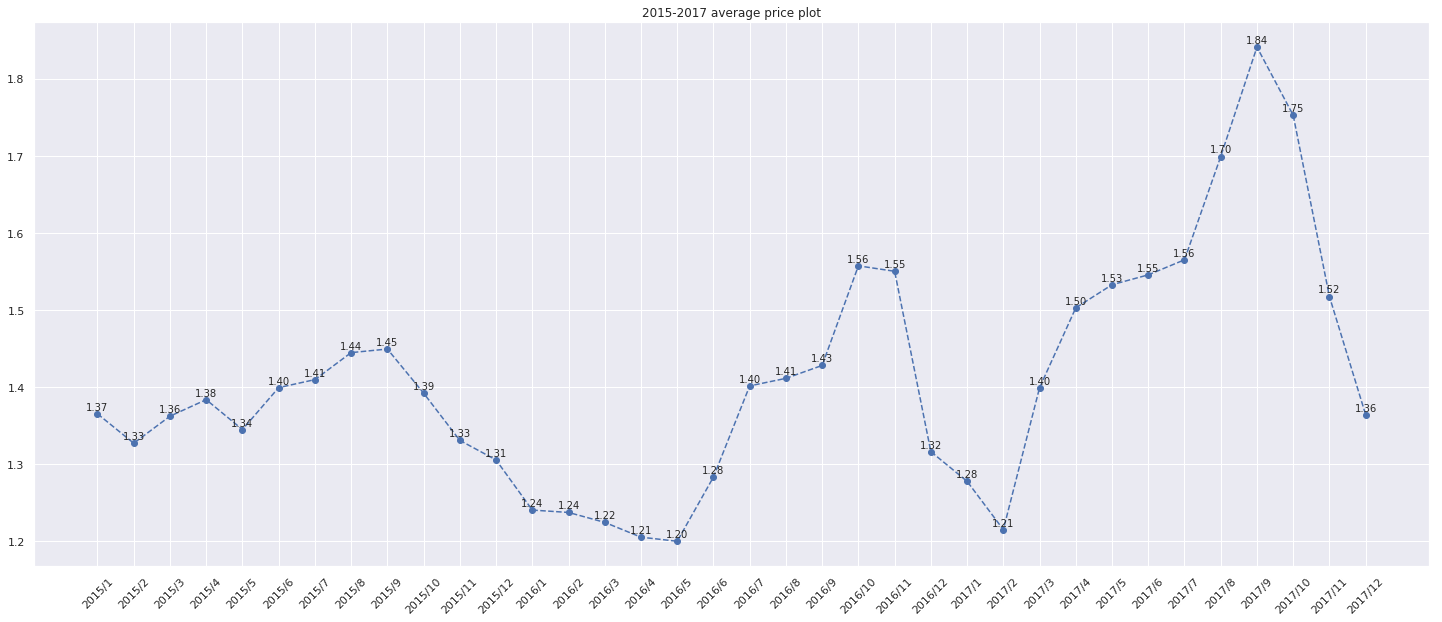

In [21]:
z2=plt.figure(figsize=(25,10))
y=np.array(list([pricePivot.iloc[0,:],pricePivot.iloc[1,:],pricePivot.iloc[2,:]]))
y=y.reshape((36,1))
plt.plot(y,linestyle='--',marker='o')
year1=np.array(['2015','2016','2017'])
month1=np.array([str(i) for i in range(1,13)])
yearmonth=[]
for i in range(3):
    for j in range(12):
        yearmonth.append(year1[i]+'/'+month1[j])
    else:
        pass
else:
    pass
x=np.arange(36)
for i,j in zip(x,y):
    plt.text(i,j+0.005,'%1.2f'%j,ha='center')
else:
    pass
plt.xticks(range(len(yearmonth)),yearmonth,rotation=45)
plt.title('2015-2017 average price plot',fontsize='large')
plt.show()

## Summary

- The average price of each month seems to be cyclical


- 2015's average price is smooth,and 2017's average price has much more fluctuation


- December~May's average price is normally low,and rising after this section


- 2017/9 has the highest price,but declining after this month


- Winter's average price is normally low,

  and autumn's average price is normally high.


- 2016/5 has the lowest price,but rising after this month.


- 2017's average price is normally higher than other year.

## Percentage of different size bags

What is the percentage of different size bags of each year?

In [22]:
DbagSum=bagsum.loc[:,['Small Bags','Large Bags','XLarge Bags']]
DbagSum

,Small Bags,Large Bags,XLarge Bags
year,,,
2015,6.346827e+08,1.320664e+08,5443128.28
2016,1.106494e+09,3.366263e+08,20038284.84
2017,1.222953e+09,3.993390e+08,23997172.34
2018,3.607414e+08,1.235840e+08,7210591.87


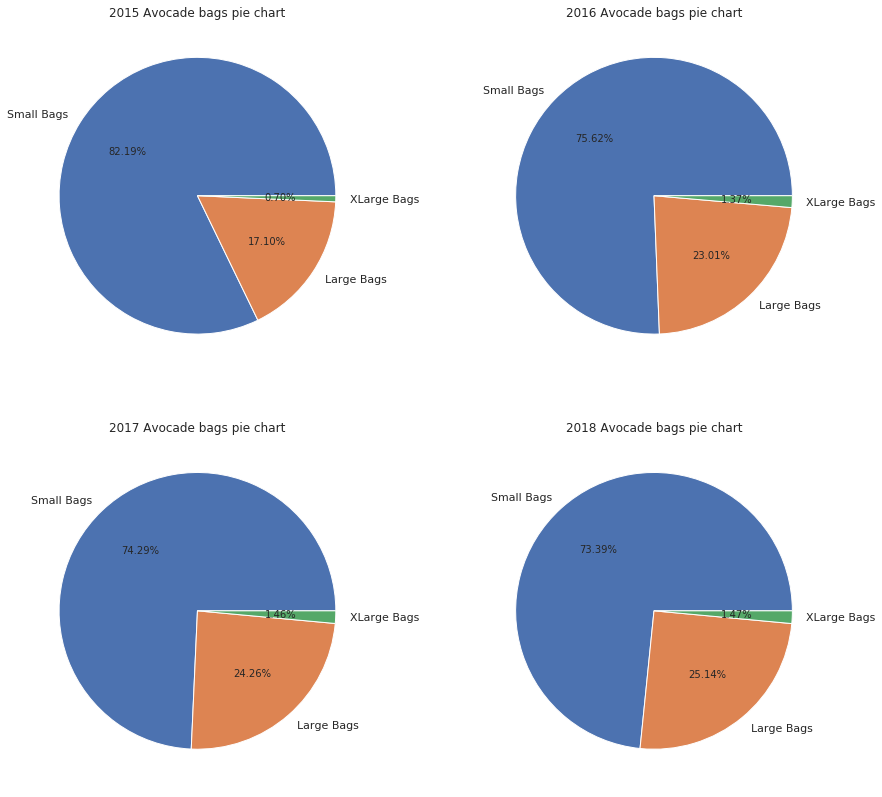

In [23]:
z3=plt.figure(figsize=(15,14))
labels=DbagSum.columns
explode=[0.0,0.0,0.0]
for i in range(DbagSum.index.shape[0]):
    z3.add_subplot(2,2,i+1)
    plt.title('%s Avocade bags pie chart'%DbagSum.index[i])
    plt.pie(DbagSum.iloc[i,:],labels=labels,explode=explode,autopct='%1.2f%%')
else:
    pass
plt.show()

## Summary

- Percentage of different size bags

Year | Bag Size | Percentage |
----- | -------- | ------------ |
2015 | Small Bags | 82.19% |
     | Large Bags | 17.10% |
     | XLarge Bags | 0.7% |
2016 | Small Bags | 75.62% |
     | Large Bags | 23.01% |
     | XLarge Bags | 1.37% |
2017 | Small Bags | 74.29% |
     | Large Bags | 24.26% |
     | XLarge Bags | 1.46% |
2018 | Small Bags | 73.39% |
     | Large Bags | 25.14% |
     | XLarge Bags | 1.47% |
  
  
- The percentage of small bags is decreasing


- The percentage of large bags is increasing fast


- The percentage of XLarge bags is increasing


- Between 2015 and 2016,the percentage of XLarge bags suddenly increase.


## Predict

## Data preprocessing

In [24]:
original.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [25]:
data=original.loc[:,['AveragePrice','4046','4225','4770','type','region']]

In [26]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,conventional,Albany
1,1.35,674.28,44638.81,58.33,conventional,Albany
2,0.93,794.7,109149.67,130.5,conventional,Albany
3,1.08,1132.0,71976.41,72.58,conventional,Albany
4,1.28,941.48,43838.39,75.78,conventional,Albany


In [27]:
print(data['type'].unique())
print(data['region'].unique())

['conventional' 'organic']
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [28]:
for i in range(data.index.shape[0]):
    if data.loc[i,'type']=='conventional':
        data.loc[i,'type']=0
    else:
        data.loc[i,'type']=1

In [29]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,0,Albany
1,1.35,674.28,44638.81,58.33,0,Albany
2,0.93,794.7,109149.67,130.5,0,Albany
3,1.08,1132.0,71976.41,72.58,0,Albany
4,1.28,941.48,43838.39,75.78,0,Albany


In [30]:
data['region']=LabelEncoder().fit_transform(data['region'])

In [31]:
data.dtypes

AveragePrice    float64
4046             object
4225             object
4770             object
type              int64
region            int64
dtype: object

In [32]:
data['4046']=data['4046'].astype('float')
data['4225']=data['4225'].astype('float')
data['4770']=data['4770'].astype('float')

## Correlation analysis--Pearson coefficient matrix

In [33]:
pd.DataFrame(data.corr(method='pearson'))

,AveragePrice,4046,4225,4770,type,region
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,0.615845,-0.011716
4046,-0.208317,1.000000,0.926110,0.833389,-0.225819,0.192073
4225,-0.172928,0.926110,1.000000,0.887855,-0.232289,0.145726
4770,-0.179446,0.833389,0.887855,1.000000,-0.210027,0.095252
type,0.615845,-0.225819,-0.232289,-0.210027,1.000000,-0.000280
region,-0.011716,0.192073,0.145726,0.095252,-0.000280,1.000000


## Summary

With pearson coefficient matrix,

4046.4225.4770 is negative correlation with average price,

and type is possitive correlation

Region has less correlation with average price.

## Principal component analysis

In [34]:
Data=data.iloc[:,1:]
Target=data.loc[:,'AveragePrice']

In [35]:
pca=PCA(n_components=5).fit(Data)
pca.explained_variance_ratio_

array([9.62409208e-01, 3.67997646e-02, 7.91027543e-04, 7.52583702e-11,
       7.70645250e-14])

In [36]:
Pca=PCA(n_components=3).fit(Data)
pData=Pca.transform(Data)
pData

array([[-378165.96094211,   26127.55855561,   -3336.40874363],
       [-385172.43668458,   19282.20726795,   -2603.88885951],
       [-340756.94815565,   65835.40652106,   -7265.94693051],
       ...,
       [-413745.94511163,  -11536.51355515,    1156.12151231],
       [-413139.82113036,  -11386.09166988,    1114.44289349],
       [-412606.25234751,  -12804.77246822,     651.06444766]])

## Summary

With using PCA,and show the explained variance ratio,

n_components is choosing 3

And transform the data.

## Predict

The correlation between features is normally ok,

and PCA n_components is 3

With using two data,

predicting average price with Gradient Boosting Regressor

## Predict--PCA

In [37]:
data_train,data_test, \
target_train,target_test = \
train_test_split(pData,Target,train_size=0.6)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [38]:
GBR=GradientBoostingRegressor(learning_rate=0.2).fit(data_train,target_train)
GBR

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
pre=GBR.predict(data_train)
print('explained_variance_score:%1.2f'%(explained_variance_score(target_train,pre)))
print('r2_score:%1.2f'%r2_score(target_train,pre))
print('mean_absolute_error:%1.2f'%mean_absolute_error(target_train,pre))
print('mean_squared_error:%1.2f'%mean_squared_error(target_train,pre))

explained_variance_score:0.53
r2_score:0.53
mean_absolute_error:0.20
mean_squared_error:0.07


In [40]:
predict=GBR.predict(data_test)
print('explained_variance_score:%1.2f'%(explained_variance_score(target_test,predict)))
print('r2_score:%1.2f'%r2_score(target_test,predict))
print('mean_absolute_error:%1.2f'%mean_absolute_error(target_test,predict))
print('mean_squared_error:%1.2f'%mean_squared_error(target_test,predict))

explained_variance_score:0.48
r2_score:0.48
mean_absolute_error:0.22
mean_squared_error:0.09


## Predict--Feature Selection

In [41]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,0,0
1,1.35,674.28,44638.81,58.33,0,0
2,0.93,794.70,109149.67,130.50,0,0
3,1.08,1132.00,71976.41,72.58,0,0
4,1.28,941.48,43838.39,75.78,0,0


In [42]:
Fdata=data.loc[:,['4046','4225','4770','type']]
Ftarget=data.loc[:,'AveragePrice']

In [43]:
dataTrain,dataTest, \
targetTrain,targetTest = \
train_test_split(Fdata,Ftarget,train_size=0.6)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
FGBR=GradientBoostingRegressor(learning_rate=0.3).fit(dataTrain,targetTrain)

In [45]:
FGBR

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
Fpre=FGBR.predict(dataTrain)
print('explained_variance_score:%1.2f'%(explained_variance_score(targetTrain,Fpre)))
print('r2_score:%1.2f'%r2_score(targetTrain,Fpre))
print('mean_absolute_error:%1.2f'%mean_absolute_error(targetTrain,Fpre))
print('mean_squared_error:%1.2f'%mean_squared_error(targetTrain,Fpre))

explained_variance_score:0.59
r2_score:0.59
mean_absolute_error:0.19
mean_squared_error:0.07


In [47]:
Fpredict=FGBR.predict(dataTest)
print('explained_variance_score:%1.2f'%(explained_variance_score(targetTest,Fpredict)))
print('r2_score:%1.2f'%r2_score(targetTest,Fpredict))
print('mean_absolute_error:%1.2f'%mean_absolute_error(targetTest,Fpredict))
print('mean_squared_error:%1.2f'%mean_squared_error(targetTest,Fpredict))

explained_variance_score:0.53
r2_score:0.53
mean_absolute_error:0.20
mean_squared_error:0.08


## Summary

With using PCA and feature selection,

finding that using feature selection has higher r2_score

- using feature selection is better than PCA data


- With using feature selection,r2_score is 0.52
